# Importing the Dependencies

In [346]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Collection and Processing

In [348]:
# loading the csv data to a Pandas Data
heart_data = pd.read_csv('HeartDiseaseTrain-Test.csv')

In [349]:
# print first 5 rows of the datset
heart_data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [350]:
# Getting dataset summary
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [351]:
# Getting dataset statistics
heart_data.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [352]:
heart_data.describe(include="all")

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
count,1025.000000,1025,1025,1025.000000,1025.00000,1025,1025,1025.000000,1025,1025.000000,1025,1025,1025,1025.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,5,4,NaN
top,NaN,Male,Typical angina,NaN,NaN,Lower than 120 mg/ml,ST-T wave abnormality,NaN,No,NaN,Flat,Zero,Fixed Defect,NaN
freq,NaN,713,497,NaN,NaN,872,513,NaN,680,NaN,482,578,544,NaN
mean,54.434146,NaN,NaN,131.611707,246.00000,NaN,NaN,149.114146,NaN,1.071512,NaN,NaN,NaN,0.513171
std,9.072290,NaN,NaN,17.516718,51.59251,NaN,NaN,23.005724,NaN,1.175053,NaN,NaN,NaN,0.500070
min,29.000000,NaN,NaN,94.000000,126.00000,NaN,NaN,71.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,48.000000,NaN,NaN,120.000000,211.00000,NaN,NaN,132.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,56.000000,NaN,NaN,130.000000,240.00000,NaN,NaN,152.000000,NaN,0.800000,NaN,NaN,NaN,1.000000
75%,61.000000,NaN,NaN,140.000000,275.00000,NaN,NaN,166.000000,NaN,1.800000,NaN,NaN,NaN,1.000000


# Data Preprocessing

In [354]:
# Checking the null values
heart_data

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [355]:
# Checking the Null Values
heart_data.isnull()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [356]:
# Checking the Null Values
heart_data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [357]:
# Checking the duplicates
heart_data.duplicated().sum()

723

In [358]:
# Checking the number of unique value in each feature
heart_data.nunique()

age                               41
sex                                2
chest_pain_type                    4
resting_blood_pressure            49
cholestoral                      152
fasting_blood_sugar                2
rest_ecg                           3
Max_heart_rate                    91
exercise_induced_angina            2
oldpeak                           40
slope                              3
vessels_colored_by_flourosopy      5
thalassemia                        4
target                             2
dtype: int64

In [359]:
heart_data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

In [360]:
cat_col= heart_data.select_dtypes(include='object').columns

In [361]:
heart_data['chest_pain_type'].unique()

array(['Typical angina', 'Atypical angina', 'Non-anginal pain',
       'Asymptomatic'], dtype=object)

In [362]:
range(heart_data['chest_pain_type'].nunique())

range(0, 4)

# Converting Categorial Values to Numeric

In [364]:
# sex: M=0,F=1
# chest_pain_type: Atypical angina(ATA)=0,Non-anginal pain(NAP)=1,Asymptomatic(ASY)=2,Typical angina(TA)=3
# RestingECG:Normal=0,ST-T wave abnormality	(ST)=1, left ventricular hypertrophy(LVH)=2
#ExerciseAngina:No(N)=0,Yes(Y)=1
#St_Slope:Upsloping(Up)=0,Flat=1,Downsloping(Down)=2

In [365]:
for col in cat_col:
    print(col)
    print((heart_data[col].unique()),list(range(heart_data[col].nunique())))
    heart_data[col].replace((heart_data[col].unique()), range(heart_data[col].nunique()), inplace=True)
    print('*'*90)
    print()

sex
['Male' 'Female'] [0, 1]
******************************************************************************************

chest_pain_type
['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic'] [0, 1, 2, 3]
******************************************************************************************

fasting_blood_sugar
['Lower than 120 mg/ml' 'Greater than 120 mg/ml'] [0, 1]
******************************************************************************************

rest_ecg
['ST-T wave abnormality' 'Normal' 'Left ventricular hypertrophy'] [0, 1, 2]
******************************************************************************************

exercise_induced_angina
['No' 'Yes'] [0, 1]
******************************************************************************************

slope
['Downsloping' 'Upsloping' 'Flat'] [0, 1, 2]
******************************************************************************************

vessels_colored_by_flourosopy
['Two' 'Zero' 'One' 'Three' 'Fou

C:\Users\talha\AppData\Local\Temp\ipykernel_23036\1443327515.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\talha\AppData\Local\Temp\ipykernel_23036\1443327515.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [366]:
heart_data

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,0,0,125,212,0,0,168,0,1.0,0,0,0,0
1,53,0,0,140,203,1,1,155,1,3.1,1,1,0,0
2,70,0,0,145,174,0,0,125,1,2.6,1,1,0,0
3,61,0,0,148,203,0,0,161,0,0.0,0,2,0,0
4,62,1,0,138,294,1,0,106,0,1.9,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,0,1,140,221,0,0,164,1,0.0,0,1,1,1
1021,60,0,0,125,258,0,1,141,1,2.8,2,2,0,0
1022,47,0,0,110,275,0,1,118,1,1.0,2,2,1,0
1023,50,1,0,110,254,0,1,159,0,0.0,0,1,1,1


In [367]:
heart_data['cholestoral'].value_counts()

cholestoral
204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: count, Length: 152, dtype: int64

In [368]:
heart_data['cholestoral'].isnull().sum()

0

In [369]:
heart_data['resting_blood_pressure'].isnull().sum()

0

In [370]:
heart_data['resting_blood_pressure'].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101], dtype=int64)

# Change columns type to int

In [372]:
withoutoldpeak = heart_data.columns
withoutoldpeak = withoutoldpeak.drop('oldpeak')
heart_data[withoutoldpeak] = heart_data[withoutoldpeak].astype('int32')

In [373]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int32  
 1   sex                            1025 non-null   int32  
 2   chest_pain_type                1025 non-null   int32  
 3   resting_blood_pressure         1025 non-null   int32  
 4   cholestoral                    1025 non-null   int32  
 5   fasting_blood_sugar            1025 non-null   int32  
 6   rest_ecg                       1025 non-null   int32  
 7   Max_heart_rate                 1025 non-null   int32  
 8   exercise_induced_angina        1025 non-null   int32  
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   int32  
 11  vessels_colored_by_flourosopy  1025 non-null   int32  
 12  thalassemia                    1025 non-null   i

In [374]:
heart_data.sample()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
953,45,1,0,138,236,0,1,152,1,0.2,2,1,1,1


In [375]:
heart_data.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
age,1.000000,0.103240,-0.071966,0.271121,0.219823,0.121243,0.183544,-0.390227,0.088163,0.208137,0.189048,0.042216,-0.072297,-0.229324
sex,0.103240,1.000000,0.041119,0.078974,0.198258,-0.027200,0.022421,0.049365,-0.139157,-0.084687,0.002296,-0.137802,0.198424,0.279501
chest_pain_type,-0.071966,0.041119,1.000000,0.038177,-0.081641,0.079294,-0.087331,0.306839,-0.401513,-0.174733,-0.154777,0.009446,0.163341,0.434854
resting_blood_pressure,0.271121,0.078974,0.038177,1.000000,0.127977,0.181767,0.165990,-0.039264,0.061197,0.187434,0.063007,-0.014549,-0.059276,-0.138772
cholestoral,0.219823,0.198258,-0.081641,0.127977,1.000000,0.026917,0.179569,-0.021772,0.067382,0.064880,0.053390,0.000745,-0.100244,-0.099966
fasting_blood_sugar,0.121243,-0.027200,0.079294,0.181767,0.026917,1.000000,0.069112,-0.008866,0.049261,0.010859,-0.005516,-0.011086,0.042177,-0.041164
rest_ecg,0.183544,0.022421,-0.087331,0.165990,0.179569,0.069112,1.000000,-0.130444,0.100127,0.174719,0.159757,0.059485,0.022913,-0.186374
Max_heart_rate,-0.390227,0.049365,0.306839,-0.039264,-0.021772,-0.008866,-0.130444,1.000000,-0.380281,-0.349796,-0.453797,-0.158547,0.098068,0.422895
exercise_induced_angina,0.088163,-0.139157,-0.401513,0.061197,0.067382,0.049261,0.100127,-0.380281,1.000000,0.310844,0.284295,0.008404,-0.197201,-0.438029
oldpeak,0.208137,-0.084687,-0.174733,0.187434,0.064880,0.010859,0.174719,-0.349796,0.310844,1.000000,0.420252,-0.035608,-0.202672,-0.438441


In [376]:
heart_data.corr()['target']

age                             -0.229324
sex                              0.279501
chest_pain_type                  0.434854
resting_blood_pressure          -0.138772
cholestoral                     -0.099966
fasting_blood_sugar             -0.041164
rest_ecg                        -0.186374
Max_heart_rate                   0.422895
exercise_induced_angina         -0.438029
oldpeak                         -0.438441
slope                           -0.382359
vessels_colored_by_flourosopy   -0.087936
thalassemia                      0.337838
target                           1.000000
Name: target, dtype: float64

In [377]:
heart_data.corr()['target'][:-1]

age                             -0.229324
sex                              0.279501
chest_pain_type                  0.434854
resting_blood_pressure          -0.138772
cholestoral                     -0.099966
fasting_blood_sugar             -0.041164
rest_ecg                        -0.186374
Max_heart_rate                   0.422895
exercise_induced_angina         -0.438029
oldpeak                         -0.438441
slope                           -0.382359
vessels_colored_by_flourosopy   -0.087936
thalassemia                      0.337838
Name: target, dtype: float64

In [378]:
heart_data.corr()['target'][:-1].sort_values()

oldpeak                         -0.438441
exercise_induced_angina         -0.438029
slope                           -0.382359
age                             -0.229324
rest_ecg                        -0.186374
resting_blood_pressure          -0.138772
cholestoral                     -0.099966
vessels_colored_by_flourosopy   -0.087936
fasting_blood_sugar             -0.041164
sex                              0.279501
thalassemia                      0.337838
Max_heart_rate                   0.422895
chest_pain_type                  0.434854
Name: target, dtype: float64

In [379]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# Data Visualization

In [381]:
import plotly.express as px

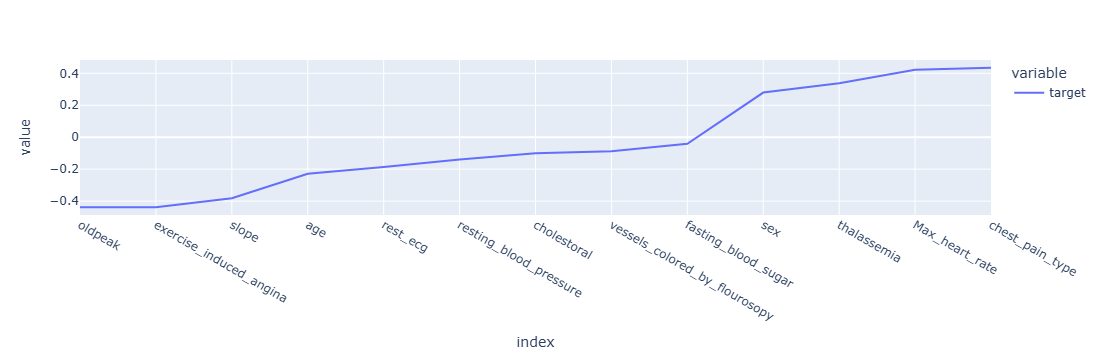

In [382]:
px.line(heart_data.corr()['target'][:-1].sort_values()) 

# Age and HeartDisease Distribution

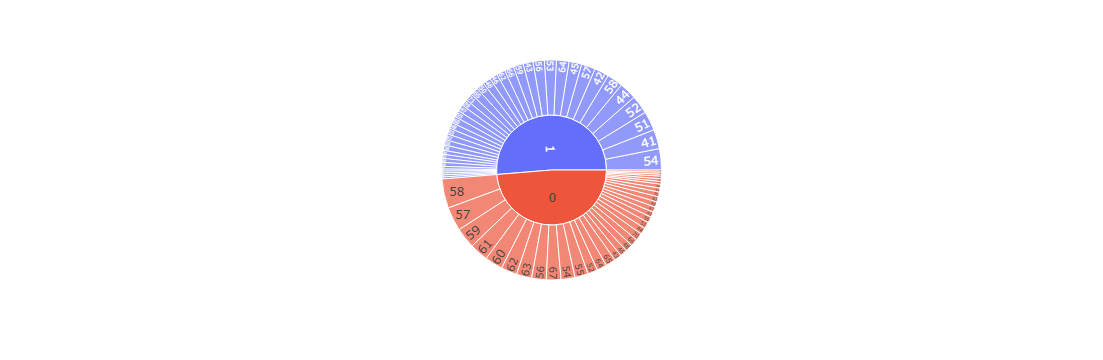

In [384]:
px.sunburst(heart_data,path=['target','age'])

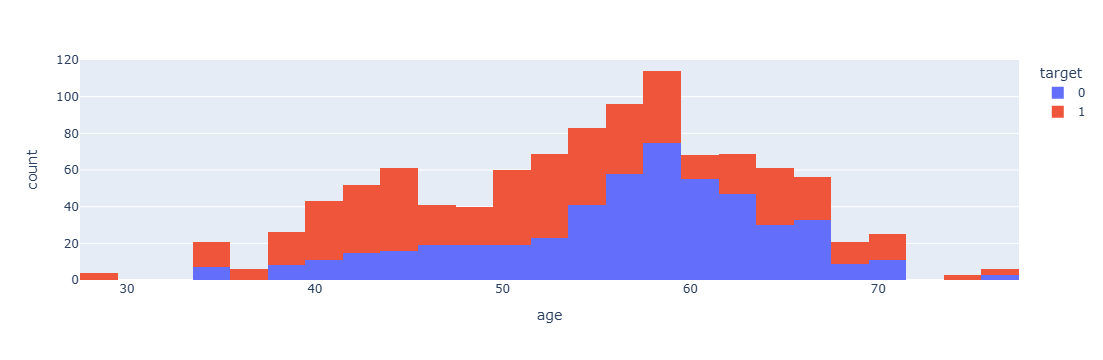

In [385]:
px.histogram(heart_data,x='age',color='target')

# Percentage of HeartDisease data distribution

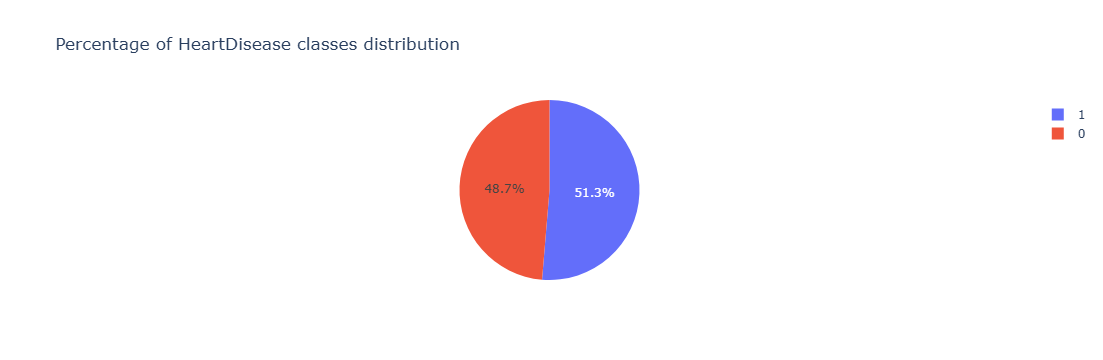

In [387]:
# Percentage of HeartDisease data distribution
px.pie(heart_data,names='target',title='Percentage of HeartDisease classes distribution')

# Gender vs Heart Disease 

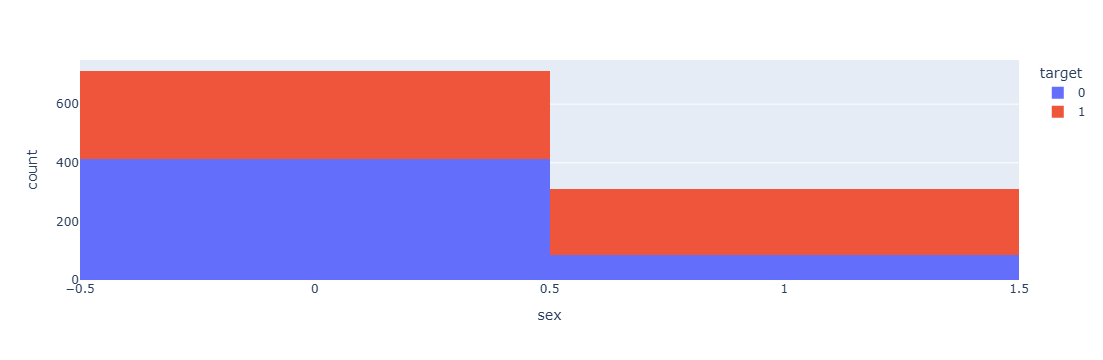

In [389]:
px.histogram(heart_data,x='sex',color='target')

# ChestPainType vs Heart Disease

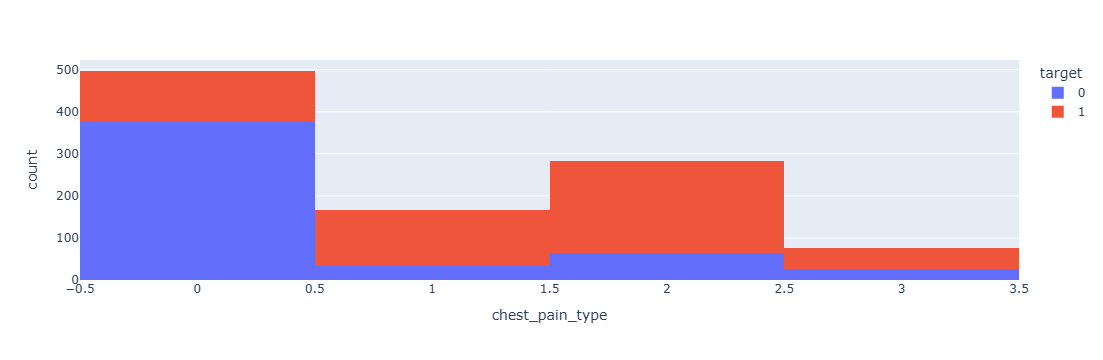

In [391]:
px.histogram(heart_data,x='chest_pain_type',color='target')
# ChestPainType : ATA=0,NAP=1,ASY=2,TA=3

# RestingBP vs HeartDisease

In [393]:
heart_data['resting_blood_pressure'].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101])

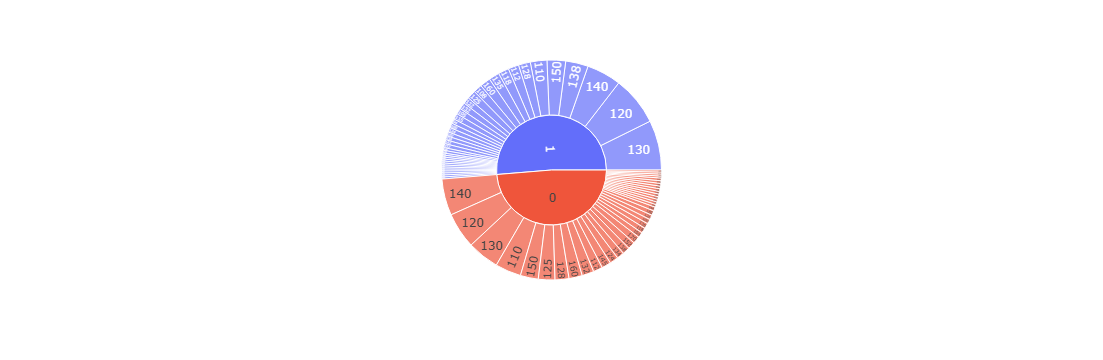

In [394]:
px.sunburst(heart_data,path=['target','resting_blood_pressure'])

#  FastingBS vs Heart Disease

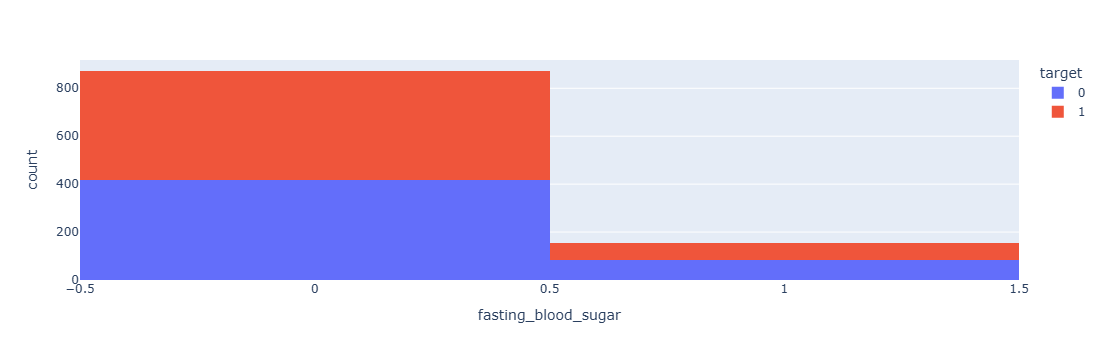

In [396]:
px.histogram(heart_data,x='fasting_blood_sugar',color='target')

# Max Heart Rate vs Heart Disease

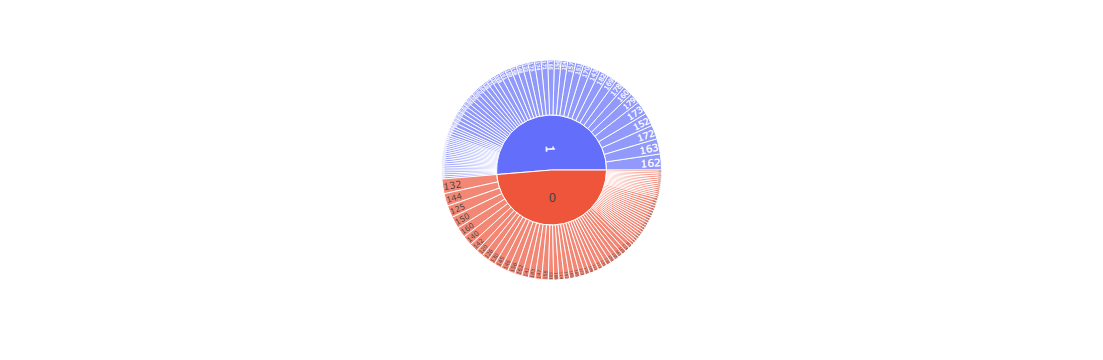

In [398]:
px.sunburst(heart_data,path=['target','Max_heart_rate'])

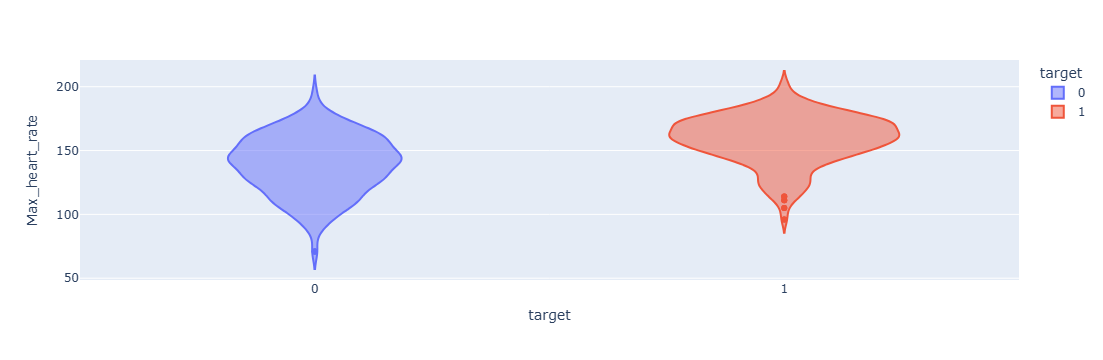

In [399]:
px.violin(heart_data,x='target',y='Max_heart_rate',color='target')

# OldPeak vs Heart Disease

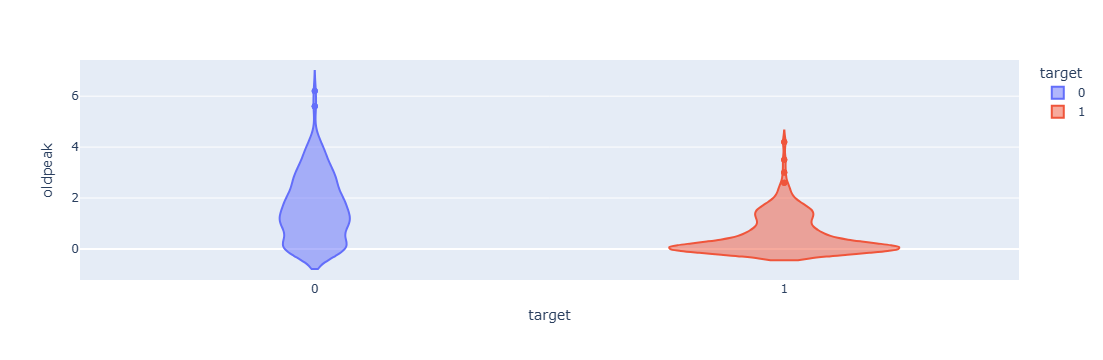

In [401]:
px.violin(heart_data,x='target',y='oldpeak',color='target')

# ST_Slope vs Heart Disease

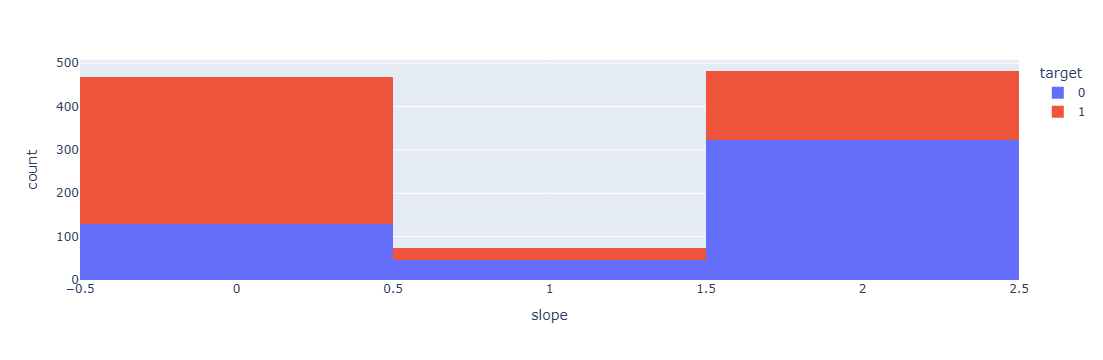

In [403]:
px.histogram(heart_data,x='slope',color='target')

# ExerciseAngina vs Heart Disease

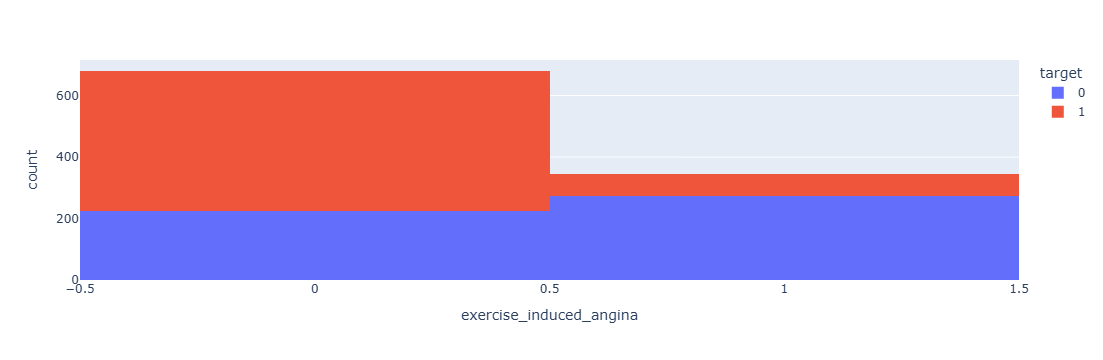

In [405]:
px.histogram(heart_data,x='exercise_induced_angina',color='target')

# Train Test Split

In [407]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(
          heart_data.drop('target', axis=1),
          heart_data['target'],
          test_size=0.2,
          random_state=42,
          stratify=heart_data['target']
      )

# Model Training

In [409]:
# Logistic Regression 

In [410]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag', 'saga']
best_solver = ''
test_score = np.zeros(6)
for i, n in enumerate(solver):
    lr = LogisticRegression(solver=n).fit(x_train, y_train)
    test_score[1] = lr.score(x_test, y_test)
    if lr.score(x_test, y_test) == test_score.max():
        best_solver = n
lr = LogisticRegression(solver=best_solver)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(f'LogisticRegression Score: {accuracy_score(y_test, lr_pred)}')

C:\Users\talha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\talha\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression Score: 0.697560975609756


C:\Users\talha\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\talha\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [411]:
import pickle

file = open('LogisticRegression.pkl','wb')
pickle.dump(lr,file)

# Support Vector Machine (SVM)

In [413]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

kernels = {'linear':0, 'poly':0, 'rbf':0, 'sigmoid':0}
best = ''
for i in kernels:
    svm = SVC(kernel=i)
    svm.fit(x_train, y_train)
    yhat = svm.predict(x_test)
    kernels[i]=f1_score(y_test, yhat, average="weighted")
    if kernels[i] == max(kernels.values()):
      best = i
print(best)
svm = SVC(kernel=best)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
print(f'SVM f1 score kernel({best}): {f1_score(y_test, svm_pred, average="weighted")}')

linear
SVM f1 score kernel(linear): 0.7938139260424864


In [414]:
import pickle

file= open('SVC.pkl','wb')
pickle.dump(svm,file)

# Decision Tree Classifier

In [416]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'random_state' : [0, 42]
}
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(x_train, y_train)

Ctree = DecisionTreeClassifier(** grid_search.best_params_, class_weight='balanced')
Ctree.fit(x_train, y_train)
dtc_pred = Ctree.predict(x_test)
print("DecisionTree's Accuracy: ",accuracy_score(y_test, dtc_pred))

DecisionTree's Accuracy:  0.9560975609756097


In [417]:
import pickle

file= open('tree.pkl','wb')
pickle.dump(Ctree,file)

# Random Forest Classifier 

In [419]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
param_grid = {
      'n_estimators' : [50, 100, 150, 500],
      'max_depth' : [3,6,9,19],
      'max_leaf_nodes': [3,6,9],
}
grid_search = GridSearchCV(rfc, param_grid)
grid_search.fit(x_train, y_train)

rfctree = RandomForestClassifier(** grid_search.best_params_)
rfctree.fit(x_train, y_train)
rfc_pred = rfctree.predict(x_test)
print("RandomForestClassifier's Accuracy: ",accuracy_score(y_test, rfc_pred))

RandomForestClassifier's Accuracy:  0.8439024390243902


In [420]:
import pickle

file= open('gridrf.pkl','wb')
pickle.dump(rfctree,file)